## 1 benchmarks for test 1


In [55]:
# Import Python Packages
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [46]:
# given mean and covariance
d = 4
mean_1 = np.array([1, 3, 5, 7])
cov_1 = np.array(
    [
        [1, 0, 0, 0],
        [0, 2.25, 0, 0],
        [0, 0, 4, 0],
        [0, 0, 0, 6.25],
    ],
)


dalp = (0.98-0.02)/30   # 0.032
alp = np.arange(0.02, 0.98+dalp, dalp) 

In [47]:
# model function
# a = np.array([1,1,1,1])

# def objfun(x):
#     result = a[0]*x[:,0]+a[1]*x[:,1]+a[2]*x[:,2]+a[3]*x[:,3]
#     return result
np.power(a,2)*cov_1

array([[1.  , 0.  , 0.  , 0.  ],
       [0.  , 2.25, 0.  , 0.  ],
       [0.  , 0.  , 4.  , 0.  ],
       [0.  , 0.  , 0.  , 6.25]])

In [48]:
# sobol indices
S_i = []
for i in range(d):
    S_i_i = a[0]**2*cov_1[i,i]/np.trace(np.power(a,2)*cov_1)
    S_i.append(S_i_i)

S_i = np.hstack(S_i)
# for plot convinence
S_i = np.tile(S_i, (len(alp),1))
                       
print(S_i)

[[0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 

In [58]:
# inverse error function
phi_inv = norm.ppf(alp)

In [59]:
# q_2: PDF of the out put Y(Eq.30)
q_2 = []
for a in range(len(alp)):
    q_2_a = []
    for i in range(d):
        q_2_i = cov_1[i,i] + phi_inv[a]**2*(np.sqrt(np.trace(cov_1))-np.sqrt(sum(cov_1[j,j] for j in range(d) if j != i)))**2
        q_2_a.append(q_2_i)
    q_2.append(q_2_a)
    
q_2 = np.vstack(q_2).reshape((len(alp),d))
print(q_2)

[[ 1.08114318  2.68226953  5.4783546  10.31452679]
 [ 1.05084778  2.52087855  4.92640012  8.79700604]
 [ 1.03656545  2.44479306  4.66618903  8.08159246]
 [ 1.02748243  2.39640559  4.50070468  7.62661666]
 [ 1.02101025  2.36192673  4.38278756  7.30242023]
 [ 1.0161193   2.33587142  4.29367881  7.05742834]
 [ 1.01229689  2.31550854  4.2240381   6.86596106]
 [ 1.00925213  2.29928838  4.16856543  6.71344681]
 [ 1.00680533  2.28625367  4.12398695  6.59088457]
 [ 1.0048389   2.275778    4.08816034  6.49238438]
 [ 1.00327286  2.26743533  4.05962854  6.41394024]
 [ 1.00205157  2.2609292   4.03737768  6.35276465]
 [ 1.00113604  2.25605198  4.02069767  6.3069053 ]
 [ 1.0004994   2.25266043  4.00909861  6.27501535]
 [ 1.00012404  2.2506608   4.00225994  6.25621338]
 [ 1.          2.25        4.          6.25      ]
 [ 1.00012404  2.2506608   4.00225994  6.25621338]
 [ 1.0004994   2.25266043  4.00909861  6.27501535]
 [ 1.00113604  2.25605198  4.02069767  6.3069053 ]
 [ 1.00205157  2.2609292   4.03

In [60]:
# Q_2: quantile based sensitivit measure 2.(Eq.14)
Q_2 = []
for a in range(len(alp)):
    Q_2_a = []
    for i in range(d):
        Q_2_i = q_2[a,i]/sum(q_2[a])
        Q_2_a.append(Q_2_i)
    Q_2.append(Q_2_a)

Q_2 = np.hstack(Q_2).reshape((len(alp),d))
print(Q_2)

[[0.05528364 0.13715633 0.28013255 0.52742747]
 [0.06075974 0.14575653 0.28484316 0.50864057]
 [0.06387063 0.15064218 0.28751918 0.497968  ]
 [0.0660709  0.1540977  0.28941188 0.49041952]
 [0.06775952 0.15674967 0.29086444 0.48462637]
 [0.0691092  0.15886934 0.29202545 0.47999601]
 [0.07021158 0.16060063 0.29297374 0.47621405]
 [0.07112141 0.16202951 0.29375638 0.47309269]
 [0.07187395 0.16321138 0.29440373 0.47051094]
 [0.07249312 0.16418379 0.29493634 0.46838675]
 [0.07299568 0.16497305 0.29536865 0.46666262]
 [0.07339358 0.16559795 0.29571093 0.46529754]
 [0.07369536 0.16607189 0.29597052 0.46426223]
 [0.07390701 0.16640429 0.29615258 0.46353612]
 [0.07403249 0.16660136 0.29626053 0.46310562]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07403249 0.16660136 0.29626053 0.46310562]
 [0.07390701 0.16640429 0.29615258 0.46353612]
 [0.07369536 0.16607189 0.29597052 0.46426223]
 [0.07339358 0.16559795 0.29571093 0.46529754]
 [0.07299568 0.16497305 0.29536865 0.46666262]
 [0.07249312 

In [53]:
# ax = plt.subplot(111)

# # plot sobol indice
# ax.plot(alp,Q_2, marker='o', markersize=4, linewidth=1)

# # plot Q_2
# ax.plot(alp,S_i, linewidth=1)

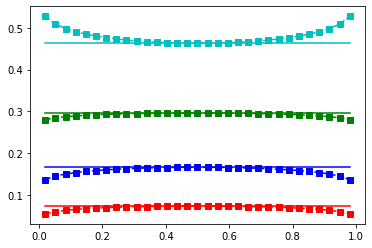

In [54]:
plt.plot(alp,Q_2[:,0],'rs--',alp,Q_2[:,1],'bs--',alp,Q_2[:,2],'gs--',alp,Q_2[:,3],'cs--')
plt.plot(alp,S_i[:,0],'r-',alp,S_i[:,1],'b-',alp,S_i[:,2],'g-',alp,S_i[:,3],'c-')
# plt.plot(alp,Q2_alp[:,0],'r*--',alp,Q2_alp[:,1],'b*--',alp,Q2_alp[:,2],'g*--',alp,Q2_alp[:,3],'c*--')

## 2 Monte Carlo estimator

### 2.1 Generate samples for x

In [10]:
# The number of samples
N = 100

# Generate sample for x given mean and covariance
x_j = np.random.multivariate_normal(mean_1,cov_1,N) # shape:(N, d)
x_j = np.sort(x_j) # shape:(100, 4)

In [ ]:
# conditional sample x




### 2.2 Get output Y by using function and sample x

In [11]:
Y_j=func1(x_j)
Y_j

array([13.57545456, 19.16214128, 12.27455049, 11.43723547, 22.52408125,
       11.88976868, 13.00883021, 11.61441518, 16.04170477, 18.60703035,
       14.30938418, 22.15244934, 21.70068667, 15.32307362, 19.52127744,
       14.22148597, 13.73370987, 17.32507777, 13.500002  , 16.86956225,
       18.73210765, 18.21416933,  9.36664679, 19.67864262, 20.807478  ,
       15.34495738, 10.12314779, 16.09969944, 14.5720227 ,  8.74398883,
       11.13603114, 15.59491944, 15.31134833, 19.38420811, 13.46023832,
       21.10108417, 19.49899722, 15.40162988, 14.72747682, 16.014937  ,
       17.79097715, 16.87668179, 16.1511971 , 12.30138617, 15.12321696,
       17.22335502, 14.77094073, 20.54962223, 14.9811047 , 19.19480445,
       17.71918481, 10.99454439, 15.00521094, 14.49361295, 18.40770628,
        8.48103583, 17.77697616, 20.83629834, 18.39328509, 16.16641277,
       10.39868723, 21.79212286, 17.13159826, 18.4527688 , 10.48402051,
       20.16864243, 13.51541698, 17.39218502, 13.50613133, 13.46

### 2.3 CDF as a function of y

#### Way 1: Define a function ecdf

In [14]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

x, y = ecdf(Y_j)

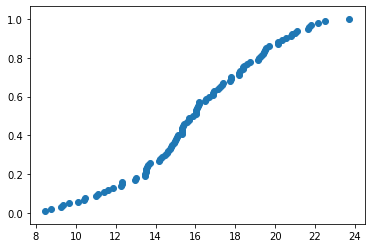

In [15]:
ecdf(Y_j)
plt.scatter(x=x, y=y)

#### Way 2: Use ECDF function from statsmodels package.

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(Y_j)

In [17]:
ecdf(20)

0.86

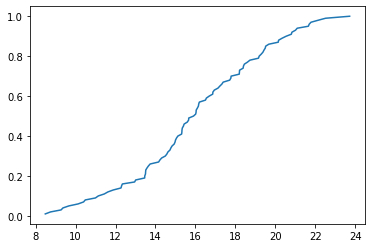

In [18]:
plt.plot(ecdf.x, ecdf.y)

### 2.4 Inverse CDF

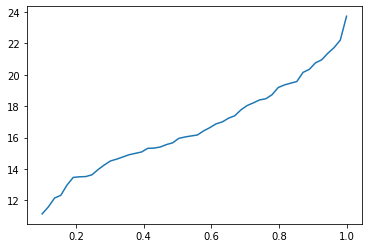

97.5 percentile: 21.972286096654447


In [20]:
from scipy.interpolate import interp1d

slope_changes = sorted(set(Y_j))

Y_edf_values_at_slope_changes = [ ecdf(item) for item in slope_changes]
inverted_edf = interp1d(Y_edf_values_at_slope_changes, slope_changes)

x = np.linspace(0.1, 1)
y = inverted_edf(x)
plt.plot(x, y)
plt.show()

print ('97.5 percentile:', inverted_edf(0.975))

### 2.5 Get measures